In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
movie = pd.read_csv("movie.csv")
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [ ]:
rating = pd.read_csv("rating_1000000.csv", index_col = 0)
rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
999995,6743,1580,4.0,2005-06-03 01:05:57
999996,6743,1584,3.0,2005-06-03 01:09:03
999997,6743,1586,3.0,2005-06-03 01:23:51
999998,6743,1589,4.0,2005-06-03 01:26:30


In [ ]:
rating = rating.drop(["timestamp"], axis = 1)
rating

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
999995,6743,1580,4.0
999996,6743,1584,3.0
999997,6743,1586,3.0
999998,6743,1589,4.0


In [ ]:
movieId = movie['movieId'].tolist()
avg_rating = []
for i in movieId:
  avg_rating.append(rating[rating.movieId == i]['rating'].mean())

In [ ]:
rating[rating.movieId == 1]['rating'].mean()

3.951883701883702

In [ ]:
len(avg_rating)

27278

In [ ]:
genres = movie['genres'].tolist()
list_genres1 = []
for string in genres:
  list_genres1.append(string.split('|'))
list_genres1 = list(list_genres1)
list_genres1

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Children', 'Drama'],
 ['Drama', '

In [ ]:
import itertools

list_genres = list(itertools.chain(*list_genres1))
list_genres = set(list_genres)
list_genres = list(list_genres)

list_genres

['Action',
 'Horror',
 'Animation',
 'Crime',
 '(no genres listed)',
 'Sci-Fi',
 'Thriller',
 'Drama',
 'War',
 'Film-Noir',
 'Fantasy',
 'Adventure',
 'Mystery',
 'Musical',
 'Children',
 'Romance',
 'IMAX',
 'Comedy',
 'Documentary',
 'Western']

In [ ]:
for string in list_genres:
  movie[string] = 0
movie

,movieId,title,genres,Action,Horror,Animation,Crime,(no genres listed),Sci-Fi,Thriller,Drama,War,Film-Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,131258,The Pirates (2014),Adventure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27276,131260,Rentun Ruusu (2001),(no genres listed),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
i = 0
for i in range(len(movie)):
  for string in list_genres:
    if string in movie['genres'][i]:
      movie[string][i] = 1

In [ ]:
movie

,movieId,title,genres,Action,Horror,Animation,Crime,(no genres listed),Sci-Fi,Thriller,Drama,War,Film-Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27275,131258,The Pirates (2014),Adventure,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27276,131260,Rentun Ruusu (2001),(no genres listed),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
del movie['genres']
movie

,movieId,title,Action,Horror,Animation,Crime,(no genres listed),Sci-Fi,Thriller,Drama,War,Film-Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western
0,1,Toy Story (1995),0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0
1,2,Jumanji (1995),0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27274,131256,"Feuer, Eis & Dosenbier (2002)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27275,131258,The Pirates (2014),0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27276,131260,Rentun Ruusu (2001),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie['avg_rating'] = avg_rating
movie = movie.dropna()

In [ ]:
movie

,movieId,title,Action,Horror,Animation,Crime,(no genres listed),Sci-Fi,Thriller,Drama,War,Film-Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western,avg_rating
0,1,Toy Story (1995),0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,3.951884
1,2,Jumanji (1995),0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,3.264176
2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.192780
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,3.026718
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.144569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27069,130073,Cinderella (2015),0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2.500000
27078,130219,The Dark Knight (2011),1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4.500000
27116,130462,The Boy (2015),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
27122,130490,Insurgent (2015),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.250000


In [ ]:
df = movie.drop(['movieId', 'title'], axis = 1)
movie_np = df.to_numpy()
movie_np

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        3.9518837 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.26417642],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.19278034],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.25      ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        3.        ]])

In [ ]:
sum_distances = []
K = range(1,100)
for k in K:
  k_mean = KMeans(n_clusters = k)
  k_mean.fit(movie_np)
  sum_distances.append(k_mean.inertia_)

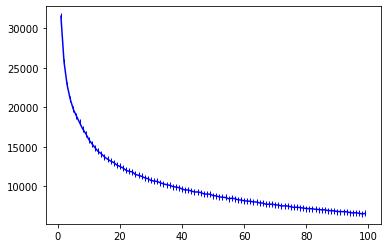

In [ ]:
plt.plot(K, sum_distances, 'b-|')
plt.show()

In [ ]:
k_mean_3 = KMeans(n_clusters = 60)
model = k_mean_3.fit(movie_np)
result = k_mean_3.labels_
result

array([54, 10,  7, ...,  6,  4,  3], dtype=int32)

In [ ]:
df

,Action,Horror,Animation,Crime,(no genres listed),Sci-Fi,Thriller,Drama,War,Film-Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western,avg_rating
0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,3.951884
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,3.264176
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.192780
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,3.026718
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.144569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27069,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2.500000
27078,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4.500000
27116,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
27122,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.250000


In [ ]:
from sklearn import metrics
ar = [0]
for i in range(60,100):
  k_mean = KMeans(n_clusters = i)
  model = k_mean.fit(movie_np)
  result = k_mean.labels_
  num = metrics.silhouette_score(movie_np, result, metric='euclidean')
  
  if max(ar) < num:
    ar.append(num)
  else:
    print(i)
    print(max(ar))


61
0.2710952910091066
64
0.2774790372283929
65
0.2774790372283929
67
0.27955114995982716
68
0.27955114995982716
69
0.27955114995982716
70
0.27955114995982716
72
0.2815307149644949
73
0.2815307149644949
75
0.2902089771075161
77
0.2942022893243519
79
0.29588275412628756
80
0.29588275412628756
81
0.29588275412628756
82
0.29588275412628756
83
0.29588275412628756
84
0.29588275412628756
86
0.29900203613120585
87
0.29900203613120585
89
0.3007666604255303
91
0.30201017863629187
92
0.30201017863629187
93
0.30201017863629187
94
0.30201017863629187
96
0.30371108443996225
97
0.30371108443996225


In [ ]:
k_mean_97 = KMeans(n_clusters = 97)
model = k_mean_97.fit(movie_np)
result = k_mean_97.labels_
result

array([26, 10, 19, ...,  1,  7, 90], dtype=int32)

In [ ]:
movie['cluster'] = result
movie.rename(columns = {'(no genres listed)': 'no_genres_listed', 'Sci-Fi': 'Sci_Fi', 'Film-Noir': 'Film_Noir'}, inplace = True)
movie

,movieId,title,Action,Horror,Animation,Crime,no_genres_listed,Sci_Fi,Thriller,Drama,War,Film_Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western,avg_rating,cluster
0,1,Toy Story (1995),0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,3.951884,26
1,2,Jumanji (1995),0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,3.264176,10
2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.192780,19
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,3.026718,62
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.144569,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27069,130073,Cinderella (2015),0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2.500000,10
27078,130219,The Dark Knight (2011),1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4.500000,63
27116,130462,The Boy (2015),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000,1
27122,130490,Insurgent (2015),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.250000,7


In [ ]:
def recommend(model,Action,Horror,Animation,Crime,no_genres_listed,Sci_Fi,Thriller,Drama,War,Film_Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western,avg_rating):
  arr = np.array([[Action,Horror,Animation,Crime,no_genres_listed,Sci_Fi,Thriller,Drama,War,Film_Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western,avg_rating]])
  pred = model.predict(arr)
  return movie[movie['cluster'] == pred[0]].sample(10)

In [ ]:
Action = 0
Horror = 0
Animation = 1
Crime	= 0
no_genres_listed = 0
Sci_Fi = 0
Thriller = 0	
Drama = 0	
War	= 0
Film_Noir = 0
Fantasy	= 1
Adventure = 0 	
Mystery	= 0
Musical	= 0 
Children = 1
Romance = 0
IMAX = 0
Comedy = 1 	
Documentary = 0 	
Western	= 0
avg_rating = 3

recommend(model,Action,Horror,Animation,Crime,no_genres_listed,Sci_Fi,Thriller,Drama,War,Film_Noir,Fantasy,Adventure,Mystery,Musical,Children,Romance,IMAX,Comedy,Documentary,Western,avg_rating)